# 281 Final Project

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import urllib
import os

from skimage.exposure import rescale_intensity
from skimage.transform import rescale, rotate
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn.metrics import mean_squared_error
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import cosine

In [130]:
test_path = './seg_test/seg_test/'
train_path = './seg_train/seg_train/'

In [131]:
def dataframe_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """
    building_path = 'buildings/'
    forest_path = 'forest/'
    glacier_path = 'glacier/'
    mountain_path = 'mountain/'
    sea_path = 'sea/'
    street_path = 'street/'
    
    building_path = os.path.join(filepath, building_path)
    forest_path = os.path.join(filepath, forest_path)
    glacier_path = os.path.join(filepath, glacier_path)
    mountain_path = os.path.join(filepath, mountain_path)
    sea_path = os.path.join(filepath, sea_path)
    street_path = os.path.join(filepath, street_path)

    building_files = [os.path.join(building_path, file) for file in os.listdir(building_path)]
    building_list = ['building'] * len(building_files)
    forest_files = [os.path.join(forest_path, file) for file in os.listdir(forest_path)]
    forest_list = ['forest'] * len(forest_files)
    glacier_files = [os.path.join(glacier_path, file) for file in os.listdir(glacier_path)]
    glacier_list = ['glacier'] * len(glacier_files)
    mountain_files = [os.path.join(mountain_path, file) for file in os.listdir(mountain_path)]
    mountain_list = ['mountain'] * len(mountain_files)
    sea_files = [os.path.join(sea_path, file) for file in os.listdir(sea_path)]
    sea_list = ['sea'] * len(sea_files)
    street_files = [os.path.join(street_path, file) for file in os.listdir(street_path)]
    street_list = ['street'] * len(street_files)

    paths = building_files + forest_files + glacier_files + mountain_files + sea_files + street_files
    labels = building_list + forest_list + glacier_list + mountain_list + sea_list + street_list

    df = pd.DataFrame({'files': paths, 'labels': labels})

    return df

In [132]:
#Create dataframe and split train/validation
df = dataframe_img(train_path)

# Define the percentage of data to assign to the validation set
validation_split = 0.2

# Create an empty 'train_or_val' column
df['train_or_val'] = 'training'

# Group the data by 'labels'
groups = df.groupby('labels')

# Update 10% of rows for each label to 'validation'
for name, group in groups:
    num_validation_samples = int(len(group) * validation_split)
    validation_indices = np.random.choice(group.index, num_validation_samples, replace=False)
    df.loc[validation_indices, 'train_or_val'] = 'validation'
    

In [153]:
df_train = df[df['train_or_val']=='training'].reset_index().drop('index', axis=1)
df_val = df[df['train_or_val']=='validation'].reset_index().drop('index', axis=1)
df_test =  dataframe_img(test_path)

In [154]:
df_train

,files,labels,train_or_val
0,./seg_train/seg_train/buildings/12536.jpg,building,training
1,./seg_train/seg_train/buildings/16750.jpg,building,training
2,./seg_train/seg_train/buildings/16988.jpg,building,training
3,./seg_train/seg_train/buildings/4571.jpg,building,training
4,./seg_train/seg_train/buildings/12244.jpg,building,training
...,...,...,...
11225,./seg_train/seg_train/street/18016.jpg,street,training
11226,./seg_train/seg_train/street/184.jpg,street,training
11227,./seg_train/seg_train/street/15526.jpg,street,training
11228,./seg_train/seg_train/street/10338.jpg,street,training


In [86]:
# read grayscale image with intensity range between 0-1
def read_image(in_path):
    img = np.array(Image.open(in_path))

    # convert to floating point image with intensity [0, 1]
    if np.max(img) > 1:
        img = img.astype(np.float32) / 255.0

    # convert to grayscale
    if len(img.shape) > 2:
        img = rgb2gray(img)

    standard = 150
    scale = standard/min(img.shape[:2])
    img = rescale(img, scale, anti_aliasing=True)
    img = img[int(img.shape[0]/2 - standard/2) : int(img.shape[0]/2 + standard/2),
              int(img.shape[1]/2 - standard/2) : int(img.shape[1]/2 + standard/2)]
    
    return img

In [148]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image from a file
img = read_image(df_train['files'][2000])
# Get the label for the image
label = df_train['labels'][2000]
# Display the image
plt.imshow(img, cmap='gray')  # 'cmap' specifies the colormap for grayscale
plt.title(label)  # Set the title to the label
plt.show()

img.shape

KeyError: 2000

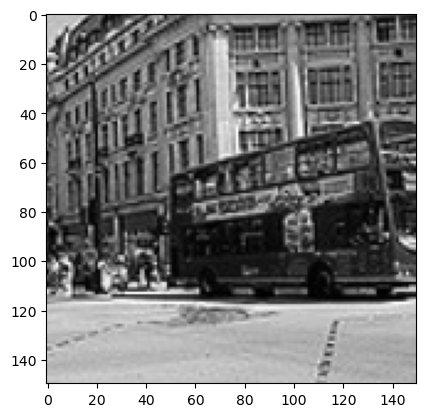

In [75]:
standard = 150
scale = standard/min(img.shape[:2])
img = rescale(img, scale, anti_aliasing=True)
img = img[int(img.shape[0]/2 - standard/2) : int(img.shape[0]/2 + standard/2),
          int(img.shape[1]/2 - standard/2) : int(img.shape[1]/2 + standard/2)]
return img

In [76]:
img.shape

(150, 150)